# Clasificación y Optimización de Hiperparámetros (Core)

**Objetivo**  
Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado y optimización de hiperparámetros. El enfoque estará especialmente centrado en la limpieza de datos y la optimización mediante GridSearchCV y RandomizedSearchCV.

**Dataset**: Medical Cost Personal Dataset

**Descripción del Dataset:**  
El dataset de costos médicos personales contiene información sobre diversos factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

**Instrucciones**:  

1. **Carga y Exploración Inicial de Datos:**
   - Cargar el dataset desde Kaggle.
   - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
   - Identificar y documentar los valores faltantes y outliers en el dataset.

2. **Preprocesamiento de Datos:**
   - Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
   - Codificar variables categóricas utilizando One-Hot Encoding.
   - Escalar características numéricas utilizando StandardScaler.

3. **Implementación de Modelos de Clasificación:**
   - Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
   - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

4. **Optimización de Hiperparámetros:**
   - Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
   - Implementar RandomizedSearchCV como método alternativo de optimización.
   - Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

5. **Evaluación de Modelos:**
   - Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
   - Generar y analizar la matriz de confusión para los modelos optimizados.
   - Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

6. **Documentación y Entrega:**
   - Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
   - Subir el notebook y los resultados a un repositorio de GitHub.
   - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

**Entregables:**

- Notebook de Jupyter con todo el análisis y resultados.
- Documentación completa del proceso de preprocesamiento, modelado y optimización.
- Visualizaciones y análisis de las métricas de rendimiento.
- Repositorio de GitHub con el notebook y los resultados, incluyendo un tag de liberación.

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

## *****************************************************************
## Contexto de las columnas:
Este DataFrame contiene las siguientes columnas:

### Variables de entrada:
1. **edad**
2. **sexo**
3. **IMC (Índice de Masa Corporal)**
4. **hábito de fumar**
5. **número de hijos**
6. **región**

### Variable de salida:
7. **costos médicos**


### 1. **Carga y Exploración Inicial de Datos:**
   - Cargar el dataset desde Kaggle.
   - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
   - Identificar y documentar los valores faltantes y outliers en el dataset.


In [74]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import calculate_null, val_cat_unicos, val_num_unicos
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Cargar el dataset
df = pd.read_csv(
    r'C:\\Users\\GIGABYTE\\Documents\\tareas_bootcamp_coding_dojo\\Proyecto_2\\data\\insurance.csv',
    encoding='latin1'
)
df.head().T  # Primeras 5 filas

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [75]:
# Exploración inicial de los datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
# Verificación de valores faltantes
calculate_null(df)


,datos sin NAs en q,Na en q,Na en %
age,1338,0,0.0
sex,1338,0,0.0
bmi,1338,0,0.0
children,1338,0,0.0
smoker,1338,0,0.0
region,1338,0,0.0
charges,1338,0,0.0


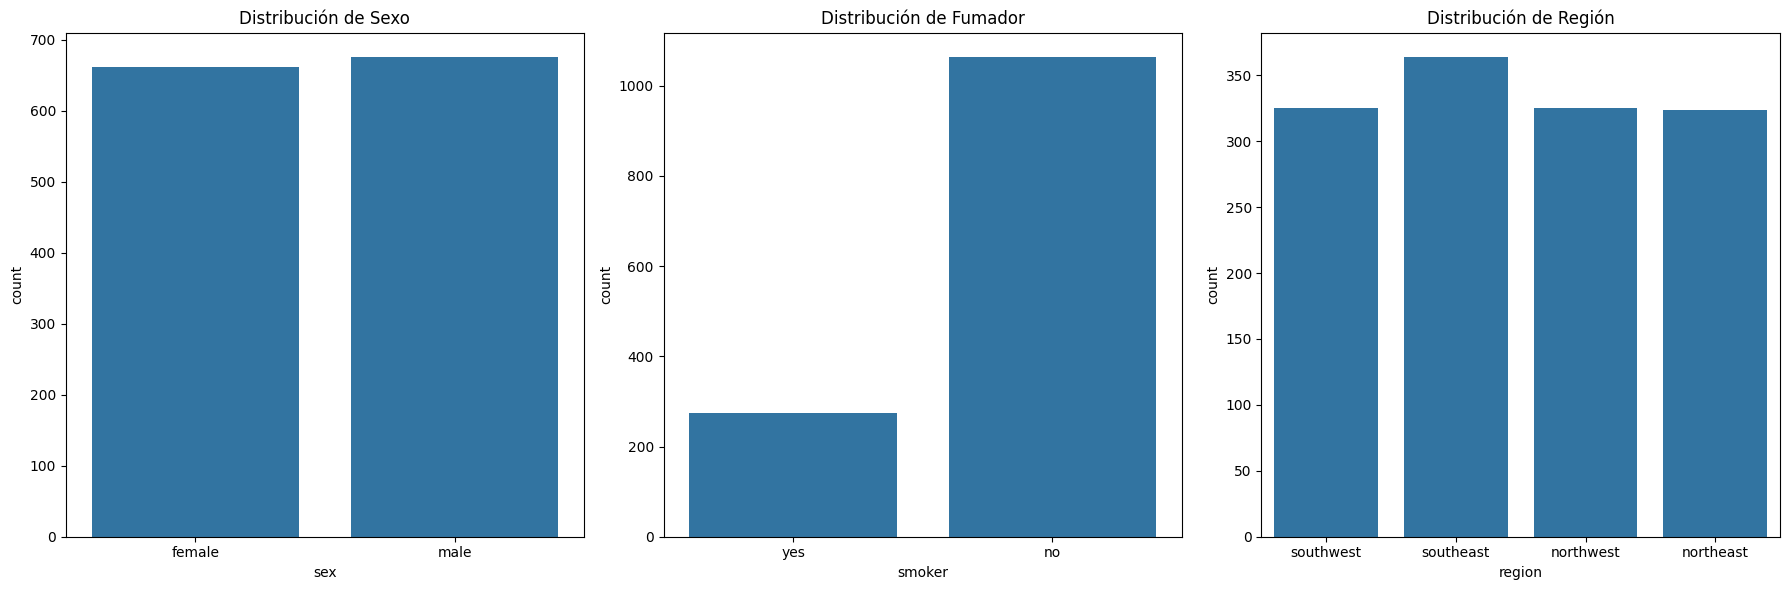

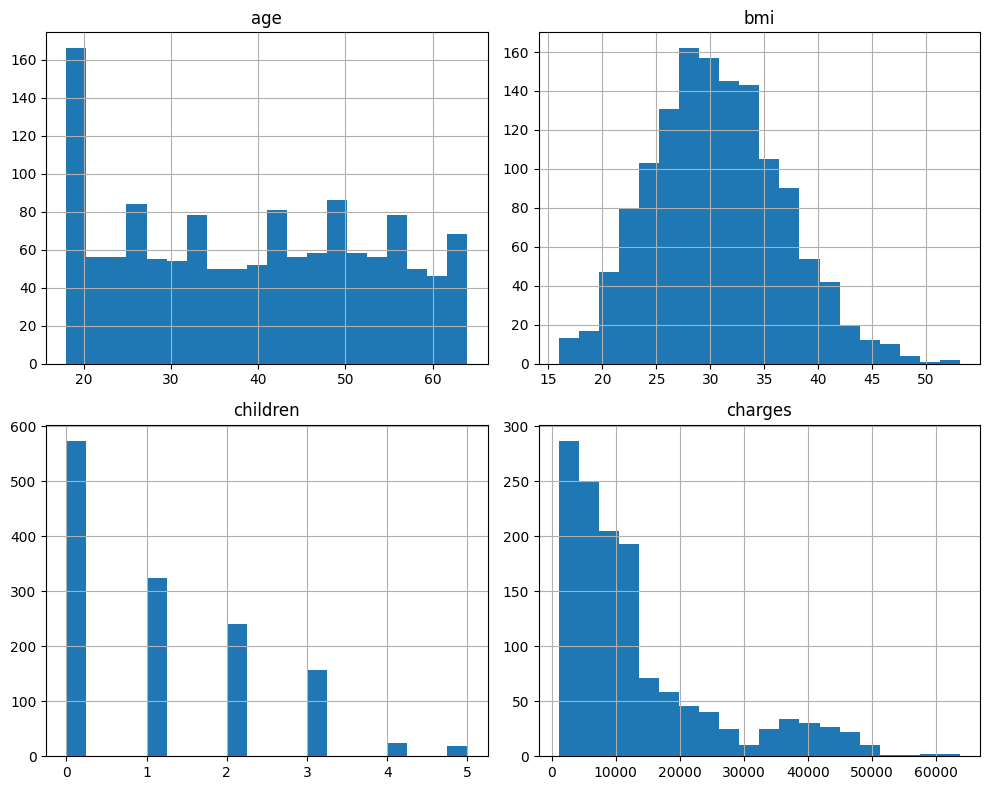

In [77]:
# Gráfico de barras para las columnas categóricas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Sexo
sns.countplot(data=df, x='sex', ax=ax[0])
ax[0].set_title('Distribución de Sexo')

# Fumador
sns.countplot(data=df, x='smoker', ax=ax[1])
ax[1].set_title('Distribución de Fumador')

# Región
sns.countplot(data=df, x='region', ax=ax[2])
ax[2].set_title('Distribución de Región')

plt.tight_layout()
plt.show()

# Histograma para las columnas numéricas
df[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

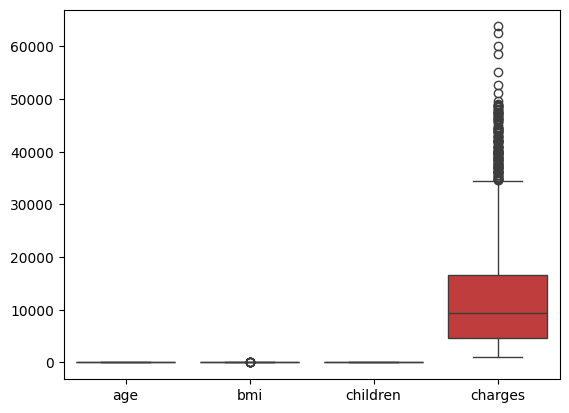

In [78]:
# Verificación de outliers visualmente (boxplot)
sns.boxplot(data=df)
plt.show()

# Manejo de valores faltantes
# Usamos SimpleImputer para imputar valores faltantes
imputer = SimpleImputer(strategy="mean")  # Para columnas numéricas
df['bmi'] = imputer.fit_transform(df[['bmi']])

### 2. **Preprocesamiento de Datos:**
   - Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
   - Codificar variables categóricas utilizando One-Hot Encoding.
   - Escalar características numéricas utilizando StandardScaler.

In [79]:
# Codificación de variables categóricas (sex, smoker, region)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Escalado de las características numéricas
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

# Definición de las características (X) y la variable objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. **Implementación de Modelos de Clasificación:**
   - Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
   - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [80]:
# Entrenamiento y evaluación de modelos sin optimización
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

for name, model in models.items():
    print(f"\nEvaluación del modelo {name}")
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Promedio de validación cruzada (MSE negativo): {-cv_scores.mean()}")



Evaluación del modelo Linear Regression
Promedio de validación cruzada (MSE negativo): 37947891.04882816

Evaluación del modelo K-Nearest Neighbors
Promedio de validación cruzada (MSE negativo): 46926322.12314384

Evaluación del modelo Decision Tree
Promedio de validación cruzada (MSE negativo): 42249056.87547055


### 4. **Optimización de Hiperparámetros:**
   - Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
   - Implementar RandomizedSearchCV como método alternativo de optimización.
   - Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

In [81]:
# Optimización de hiperparámetros con GridSearchCV y RandomizedSearchCV

# GridSearchCV para KNN
param_grid_knn = {'n_neighbors': np.arange(1, 20)}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
print(f"Mejores parámetros para KNN con GridSearch: {grid_search_knn.best_params_}")

# RandomizedSearchCV para KNN
param_dist_knn = {'n_neighbors': np.arange(1, 20)}
random_search_knn = RandomizedSearchCV(KNeighborsRegressor(), param_dist_knn, cv=5, n_iter=10, scoring='neg_mean_squared_error')
random_search_knn.fit(X_train, y_train)
print(f"Mejores parámetros para KNN con RandomizedSearch: {random_search_knn.best_params_}")


Mejores parámetros para KNN con GridSearch: {'n_neighbors': np.int64(3)}
Mejores parámetros para KNN con RandomizedSearch: {'n_neighbors': np.int64(3)}


### 5. **Evaluación de Modelos:**
   - Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
   - Generar y analizar la matriz de confusión para los modelos optimizados.
   - Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.



Métricas del modelo optimizado KNN:
R^2: 0.7173624072874587
Error cuadrático medio (MSE): 43879127.740510546


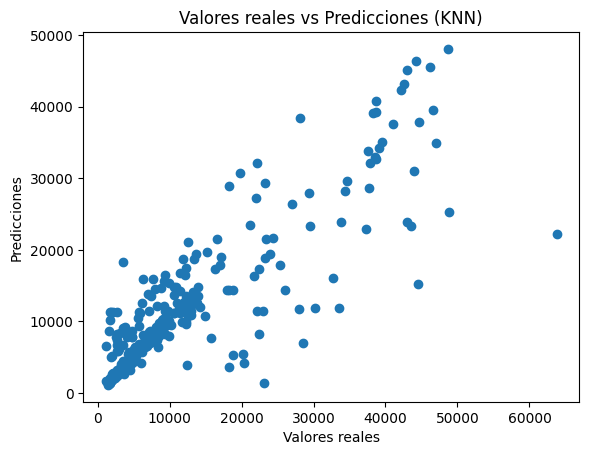

In [82]:
# Evaluación de modelos optimizados
best_knn = grid_search_knn.best_estimator_

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print("\nMétricas del modelo optimizado KNN:")
print(f"R^2: {r2_score(y_test, y_pred_knn)}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred_knn)}")

# Visualización de la comparación entre valores reales y predicciones
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones (KNN)')
plt.show()



### Conclusiones:

- **Mejor rendimiento en validación cruzada:**  
  El modelo de **Linear Regression** tiene el menor MSE negativo, lo que indica que, en general, es el más preciso entre los tres modelos durante la validación cruzada.

- **Mejor modelo optimizado:**  
  Después de realizar la optimización con **KNN**, el modelo optimizado tiene un buen valor de **R² (0.717)** y un **MSE** razonablemente bajo. Esto sugiere que, después de la optimización, el modelo KNN es bastante competente en predecir la variable objetivo, aunque el modelo de regresión lineal sigue siendo competitivo.

- **Árbol de decisión:**  
  Aunque el **árbol de decisión** también tiene un rendimiento razonable, su **MSE negativo** es más alto que el de los otros modelos, lo que lo coloca en una posición menos favorable en comparación.

### Resumen:
El modelo **Linear Regression** podría ser una opción sólida debido a su bajo error durante la validación cruzada, pero **KNN optimizado** también ofrece un rendimiento destacable, especialmente después de la optimización de sus parámetros.
---